### Import all the libarys needed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import joblib


### Load the training dataset

In [5]:
train_data = pd.read_csv("supply_train.csv")

### Perform Exploratory Data Analysis (EDA)

In [6]:
train_data

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0               0     WH_100000     EID_50000         Urban            Small   
1               1     WH_100001     EID_50001         Rural            Large   
2               2     WH_100002     EID_50002         Rural              Mid   
3               3     WH_100003     EID_50003         Rural              Mid   
4               4     WH_100004     EID_50004         Rural            Large   
...           ...           ...           ...           ...              ...   
16615       16615     WH_116615     EID_66615         Urban            Large   
16616       16616     WH_116616     EID_66616         Urban            Large   
16617       16617     WH_116617     EID_66617         Rural            Large   
16618       16618     WH_116618     EID_66618         Rural            Small   
16619       16619     WH_116619     EID_66619         Rural            Large   

        zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0       West           Zone 6                   3                    1   
1      North           Zone 5                   0                    0   
2      South           Zone 2                   1                    0   
3      North           Zone 3                   7                    4   
4      North           Zone 5                   3                    1   
...      ...              ...                 ...                  ...   
16615   West           Zone 6                   3                    1   
16616  North           Zone 5                   2                    0   
16617  North           Zone 6                   5                    0   
16618   West           Zone 6                   3                    2   
16619   West           Zone 5                   4                    0   

       Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                      2  ...                1            91         29.0   
1                      4  ...                1           210         31.0   
2                      4  ...                0           161         37.0   
3                      2  ...                0           103         21.0   
4                      2  ...                1           112         25.0   
...                  ...  ...              ...           ...          ...   
16615                  6  ...                0           240         19.0   
16616                  2  ...                1           164         30.0   
16617                  4  ...                1           211         24.0   
16618                  3  ...                1           119          NaN   
16619                  6  ...                1           261         34.0   

       wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0              NaN                          13              0   
1              NaN                           4              0   
2              NaN                          17              0   
3              NaN                          17              1   
4           2009.0                          18              0   
...            ...                         ...            ...   
16615       2009.0                          14              0   
16616          NaN                          17              0   
16617       2003.0                          24              1   
16618       2007.0                          16              0   
16619       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                                 C                 6              24   
...          

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [7]:
train_data.shape

(16620, 25)

#### Summary statistics

In [8]:
train_data.describe()

Unnamed: 0  num_refill_req_l3m  transport_issue_l1y  \
count  16620.000000        16620.000000         16620.000000   
mean    8309.500000            4.126655             0.780927   
std     4797.925072            2.606241             1.206351   
min        0.000000            0.000000             0.000000   
25%     4154.750000            2.000000             0.000000   
50%     8309.500000            4.000000             0.000000   
75%    12464.250000            6.000000             1.000000   
max    16619.000000            8.000000             5.000000   

       Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
count       16620.000000     16620.000000     16620.000000    16620.000000   
mean            3.103129      4983.904994        42.473706        0.096871   
std             1.147711      1051.032239        16.090000        0.295791   
min             0.000000      1821.000000        15.000000        0.000000   
25%             2.000000      4309.000000        29.000000        0.000000   
50%             3.000000      4856.000000        42.000000        0.000000   
75%             4.000000      5500.000000        56.000000        0.000000   
max            12.000000     11008.000000        70.000000        1.000000   

        flood_proof  electric_supply  dist_from_hub   workers_num  \
count  16620.000000     16620.000000   16620.000000  15953.000000   
mean       0.056017         0.655716     163.521901     28.911490   
std        0.229961         0.475149      62.701193      7.842046   
min        0.000000         0.000000      55.000000     10.000000   
25%        0.000000         0.000000     109.000000     24.000000   
50%        0.000000         1.000000     164.000000     28.000000   
75%        0.000000         1.000000     218.000000     33.000000   
max        1.000000         1.000000     271.000000     98.000000   

       wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
count  8760.000000                16620.000000   16620.000000   
mean   2009.345320                   17.127196       0.306137   
std       7.544672                    9.163901       0.460901   
min    1996.000000                    0.000000       0.000000   
25%    2003.000000                   10.000000       0.000000   
50%    2009.000000                   18.000000       0.000000   
75%    2016.000000                   24.000000       1.000000   
max    2023.000000                   39.000000       1.000000   

       wh_breakdown_l3m  govt_check_l3m  product_wg_ton  
count      16620.000000    16620.000000    16620.000000  
mean           3.491095       18.727377    22098.420096  
std            1.688614        8.619857    11620.337346  
min            0.000000        1.000000     2093.000000  
25%            2.000000       11.000000    13057.000000  
50%            3.000000       19.000000    22099.000000  
75%            5.000000       26.000000    30103.000000  
max            6.000000       32.000000    55151.000000

### Data visualization (e.g., histograms, box plots, scatter plots)

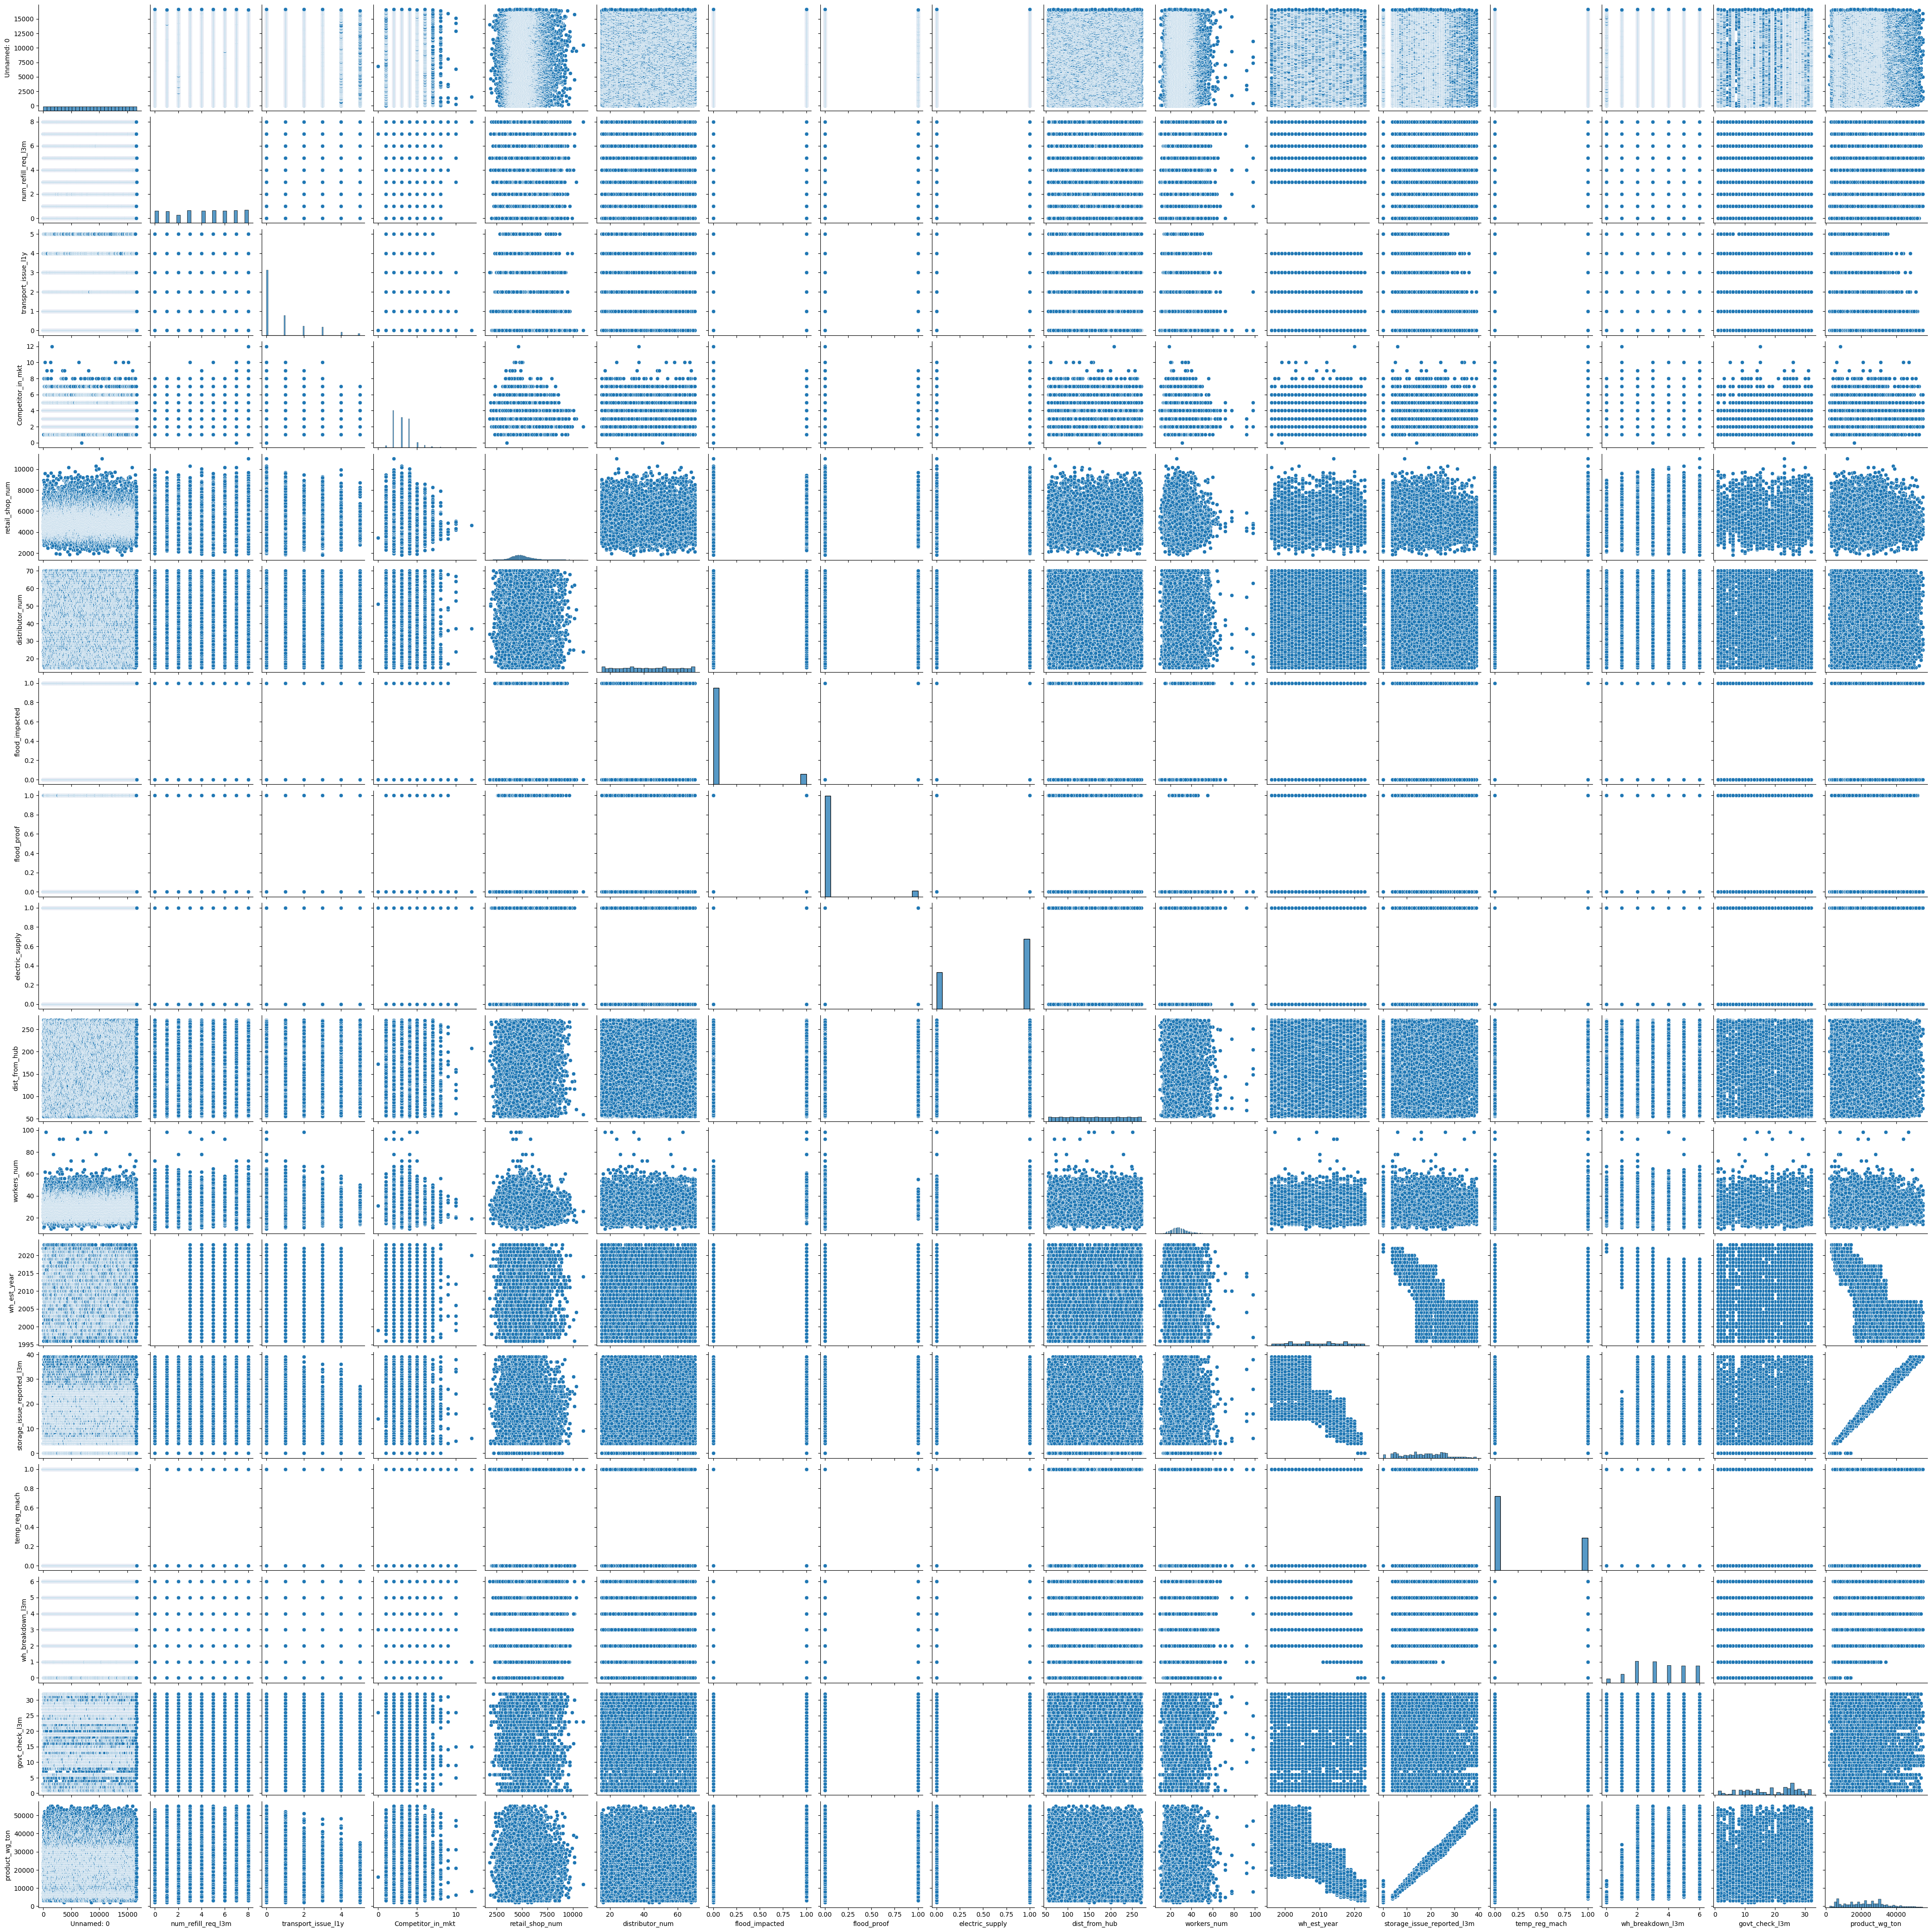

In [17]:
sns.pairplot(train_data)

In [18]:
train_data.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [11]:
train_data.shape

(16620, 25)

### Visualize the data

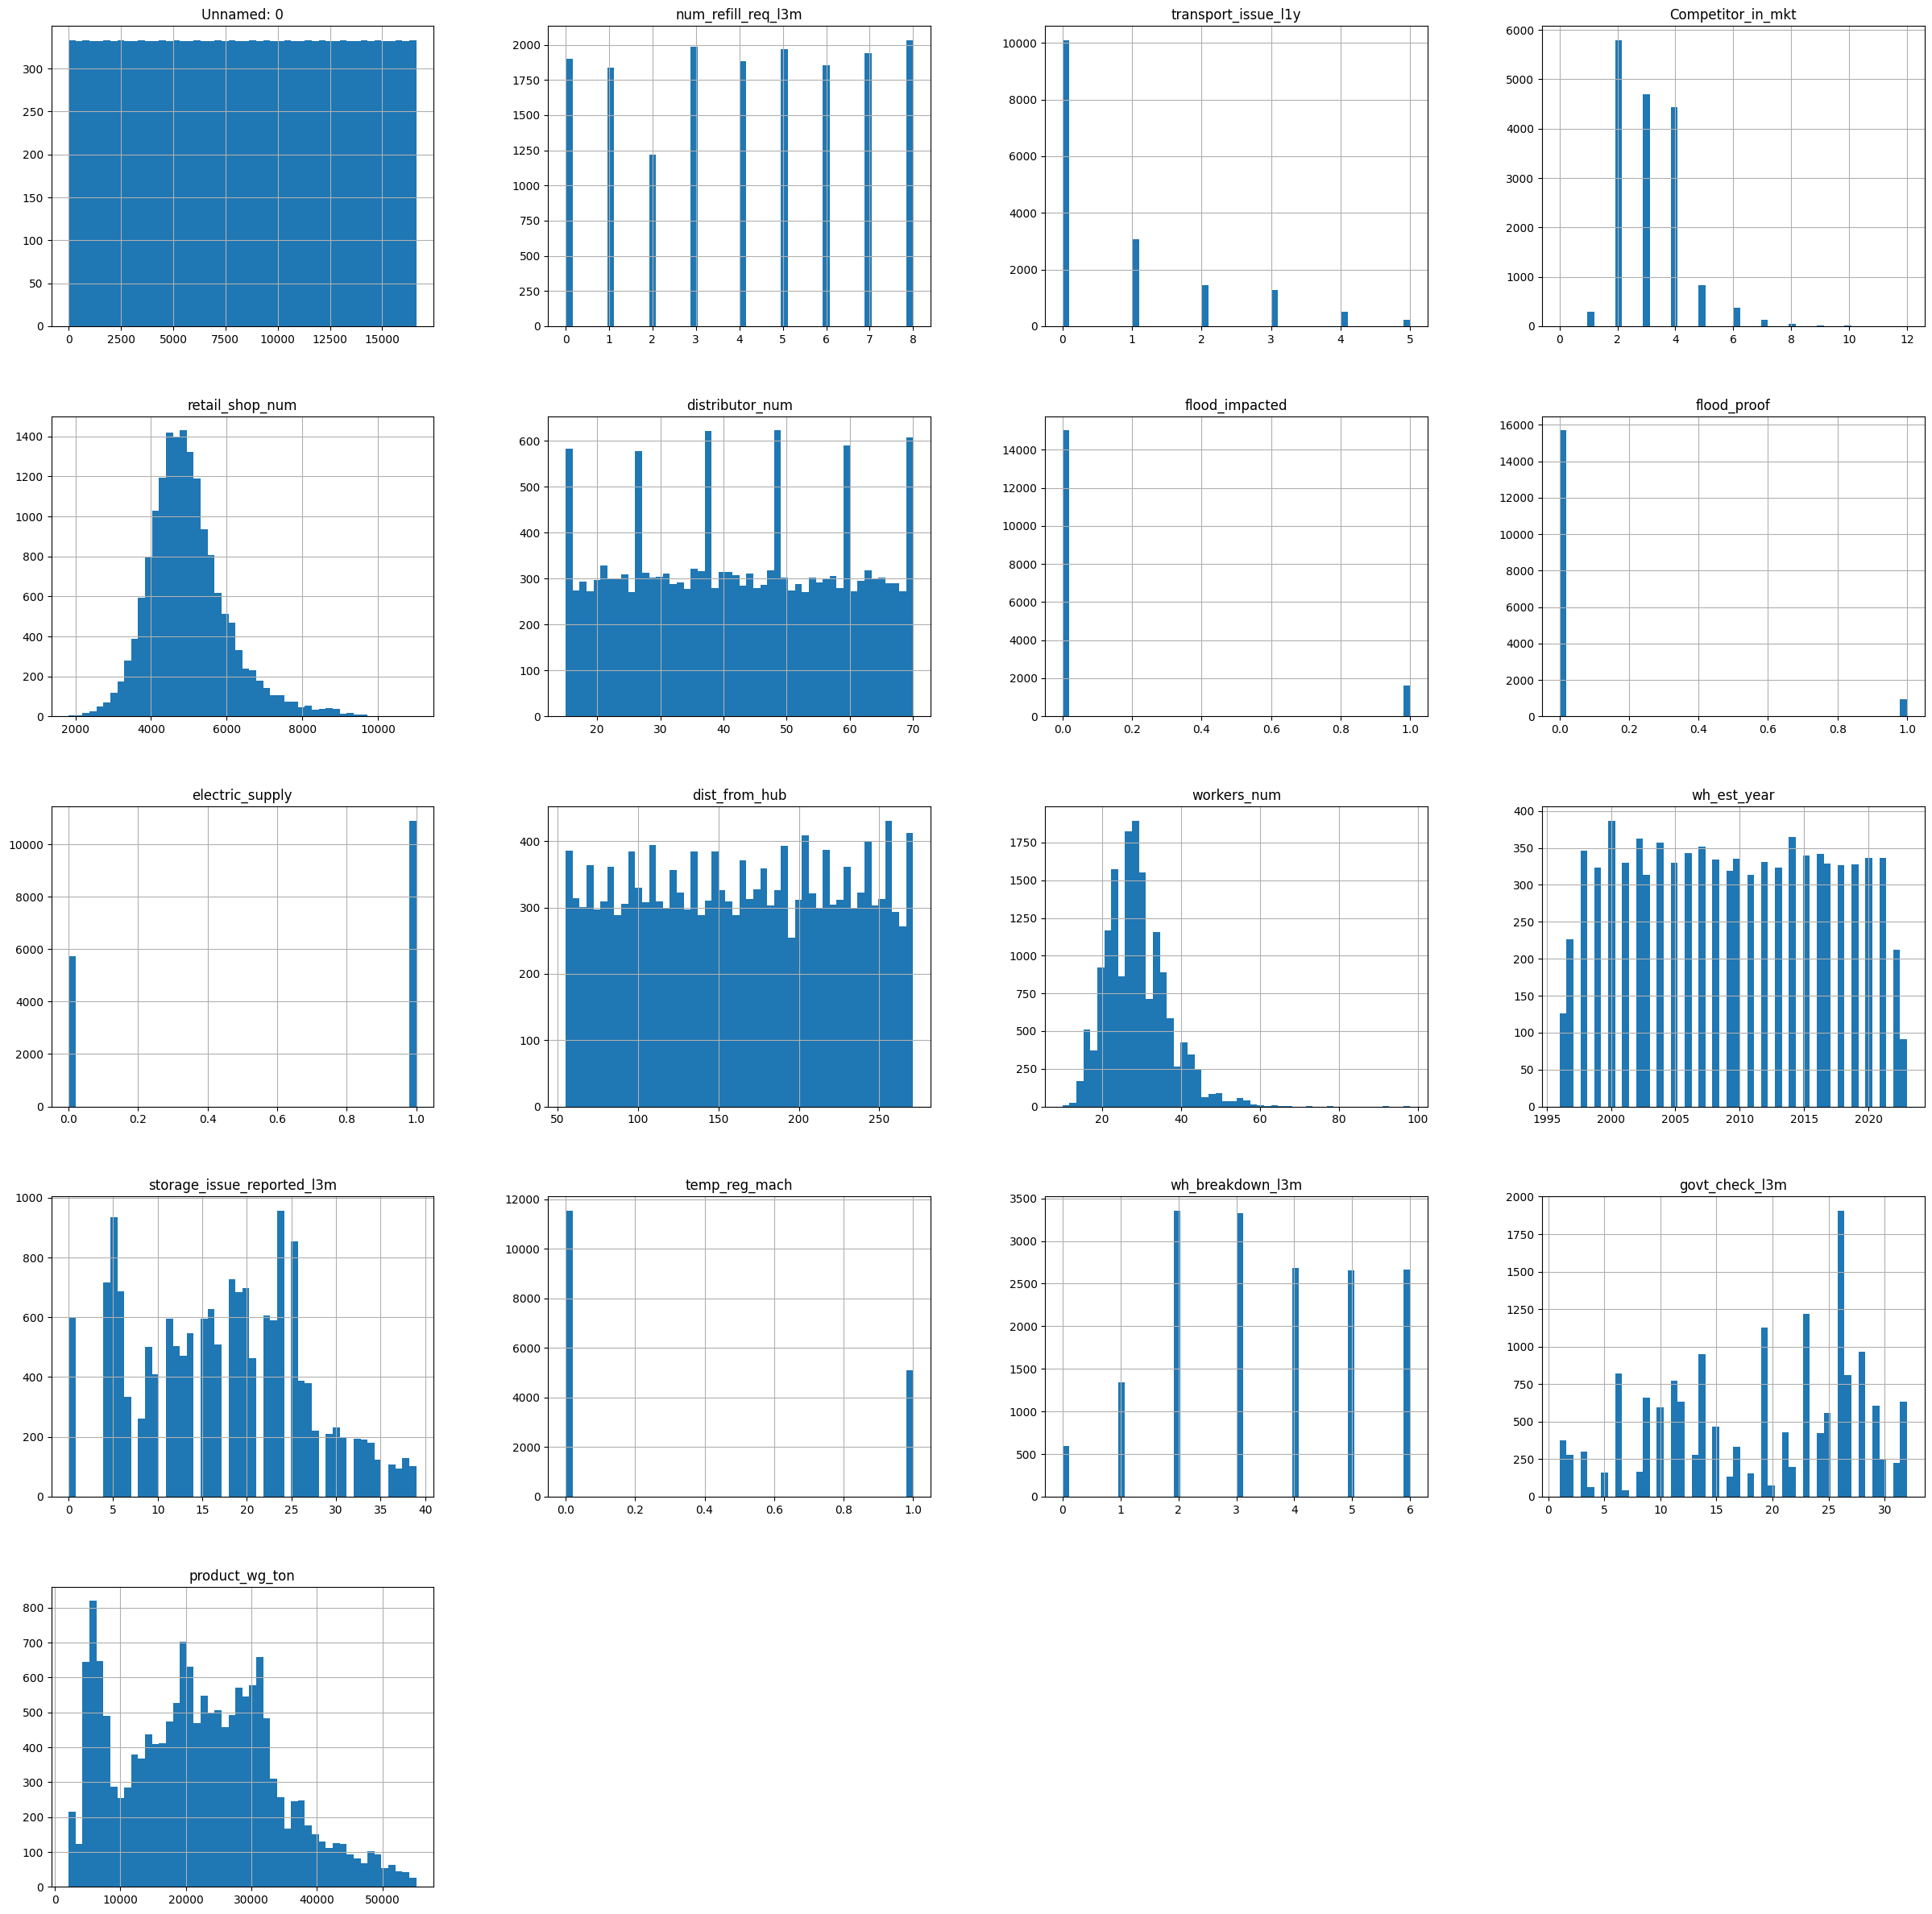

In [28]:
train_data.hist(bins=50, figsize=(30,30))
plt.show()

In [29]:
train_data.shape

(16620, 25)

### Handle missing values

In [30]:
train_data.fillna(0, inplace=True)


###  Encode categorical variables (e.g., one-hot encoding)

In [31]:
train_data = pd.get_dummies(train_data, columns=['wh_owner_type', 'approved_wh_govt_certificate', 'Ware_house_ID','WH_Manager_ID','Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',  ])


In [34]:
train_data.head(5)


Unnamed: 0  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0           0                   3                    1                  2   
1           1                   0                    0                  4   
2           2                   1                    0                  4   
3           3                   7                    4                  2   
4           4                   3                    1                  2   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0             4651               24               0            1   
1             6217               47               0            0   
2             4306               64               0            0   
3             6000               50               0            0   
4             4740               42               1            0   

   electric_supply  dist_from_hub  ...  zone_East  zone_North  zone_South  \
0                1             91  ...      False       False       False   
1                1            210  ...      False        True       False   
2                0            161  ...      False       False        True   
3                0            103  ...      False        True       False   
4                1            112  ...      False        True       False   

   zone_West  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0       True                    False                    False   
1      False                    False                    False   
2      False                    False                     True   
3      False                    False                    False   
4      False                    False                    False   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                    False                    False                    False   
1                    False                    False                     True   
2                    False                    False                    False   
3                     True                    False                    False   
4                    False                    False                     True   

   WH_regional_zone_Zone 6  
0                     True  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 33280 columns]

In [35]:
train_data.shape

(16620, 33280)

### Split data into features (X) and target (y)

In [36]:
# Sample a subset of your data (adjust the sample size as needed)
sample_size = 1000  # You can change this to your desired sample size
sampled_data = train_data.sample(n=sample_size, random_state=42)

# Split the sampled data into training and testing sets
X_sampled = sampled_data.drop(columns=['product_wg_ton'])
y_sampled = sampled_data['product_wg_ton']
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [37]:
X_sampled.shape


(1000, 33279)

In [38]:
y_sampled.shape

(1000,)

In [39]:
X_sampled.head(1)

Unnamed: 0  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
8299        8299                   3                    0                  4   

      retail_shop_num  distributor_num  flood_impacted  flood_proof  \
8299             4987               68               1            1   

      electric_supply  dist_from_hub  ...  zone_East  zone_North  zone_South  \
8299                1            221  ...      False        True       False   

      zone_West  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
8299      False                    False                    False   

      WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
8299                     True                    False   

      WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  
8299                    False                    False  

[1 rows x 33279 columns]

In [40]:
y_sampled.head(2)

8299    30132
9571    30093
Name: product_wg_ton, dtype: int64

### Standardize features by removing the mean and scaling to unit variance

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_sampled)
X_test_scaled = scaler.transform(X_test)


In [42]:
X_train_scaled.shape

(1000, 33279)

In [43]:
X_test_scaled.shape

(200, 33279)

### Principal component analysis (PCA) 
It is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

In [45]:

# Sample data
X = np.random.rand(100, 5)  # 100 samples with 5 features

# Create a PCA instance with the desired number of components
pca = PCA(n_components=2)

# Fit the data and transform it
X_pca = pca.fit_transform(X_train_scaled)

# X_reduced now contains the data with reduced dimensionality


In [47]:
X_pca.shape

(1000, 2)

In [50]:
pca.explained_variance_ratio_

array([0.00250551, 0.002141  ])

In [49]:
pca.n_components_

2

#### Train the model with pca

In [51]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_sampled, test_size= 0.2, random_state =42)


In [52]:
X_pca.shape

(1000, 2)

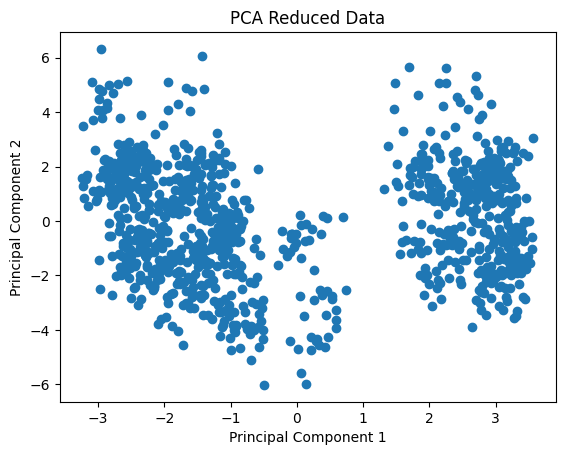

In [53]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data')
plt.show()


### Build ML models

#### Define the models

In [54]:
X_test.shape

(200, 33279)

In [55]:
X_test_pca.shape

(200, 2)

In [57]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_pca, y_sampled)
lr_pred = lr_model.predict(X_test_pca)


In [58]:
# 2. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_pca, y_sampled)
rf_pred = rf_model.predict(X_test_pca)


In [59]:
# 3. Decision Tree (Regression)
tree_model = DecisionTreeRegressor()
tree_model.fit(X_pca, y_sampled)
tree_pred = tree_model.predict(X_test_pca)

In [60]:
# 4. Support Vector Machine (Regression)
svm_model = SVR()
svm_model.fit(X_pca, y_sampled)
svm_pred = svm_model.predict(X_test_pca)


In [61]:
# 5. Gradient Boosting (Regression)
gb_model = GradientBoostingRegressor()
gb_model.fit(X_pca, y_sampled)
gb_pred = gb_model.predict(X_test_pca)


In [62]:
# 6. XGBoost (Regression)
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_pca, y_sampled)
xgb_pred = xgb_model.predict(X_test_pca)


In [64]:
# Evaluate the regression models
def evaluate_regression_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

regression_models = [lr_model, rf_model, tree_model, svm_model, gb_model, xgb_model]

best_regression_model = None
best_mse = float("inf")

for model in regression_models:
    mse, r2 = evaluate_regression_model(model, y_test, model.predict(X_test_pca))
    print(f"Regression Model: {model.__class__.__name__}, MSE: {mse}, R-squared: {r2}")
    
    if mse < best_mse:
        best_mse = mse
        best_regression_model = model

print(f"Best Regression Model: {best_regression_model.__class__.__name__} with MSE: {best_mse}")






Regression Model: LinearRegression, MSE: 136696713.8313148, R-squared: -0.002703745500351573
Regression Model: RandomForestRegressor, MSE: 21631687.771432504, R-squared: 0.8413262927690023
Regression Model: DecisionTreeRegressor, MSE: 0.0, R-squared: 1.0
Regression Model: SVR, MSE: 136284383.76994947, R-squared: 0.0003207960948737876
Regression Model: GradientBoostingRegressor, MSE: 101792426.61140256, R-squared: 0.2533277167673865
Regression Model: XGBRegressor, MSE: 17731188.819540787, R-squared: 0.8699374041758814
Best Regression Model: DecisionTreeRegressor with MSE: 0.0


#### Train and evaluate each model

### Conclusion

 Best Regression Model: DecisionTreeRegressor with MSE: 0.0

 R-squared: 1.0

 Model DecisionTreeRegressor is the best ML model having 100 % accuracy

##### Save the best model for future predictions

In [82]:
# Step 1: Train the DecisionTreeRegressor model (you can use your own dataset)
#X_train, y_train = your_training_data  # Replace with your actual training data
model = DecisionTreeRegressor()
model.fit(X_pca, y_sampled)

# Save the model to a file
model_filename = "decision_tree_model.pkl"
joblib.dump(model, model_filename)

# Later, when you want to make future predictions:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Prepare the input data for future prediction
# Use the loaded model to predict future values
y_future_pred = loaded_model.predict(X_test_pca)

print("Future Predictions:")
print(y_future_pred)


Future Predictions:
[33060.  6131. 35090.  8075. 38147. 19061. 22123. 30086. 14136. 14065.
 12134. 49083.  9075. 34063.  5082. 31126. 48145.  8108.  4057. 10058.
 28091. 11140. 20066.  6147.  9096.  5086. 32137. 22144. 26089. 28122.
 28056. 21103. 28108. 26079. 29131.  8142. 30112. 26107.  7094. 27099.
  6075.  5079. 42131. 20136. 33072.  5084. 25143. 13060. 44081. 12138.
 31112. 33142. 50130. 42062. 14108. 28082. 16094. 17144. 28074. 35119.
 30097. 11077.  6115. 14105. 31121.  3139. 13090. 13076.  6060. 16150.
 15102. 32119. 31118. 15097. 30062.  7146. 28093. 12062. 31136.  6096.
 16099. 22115. 34065. 16091. 34058. 28087. 20113.  5074. 18080. 17139.
 29089. 19122. 29100. 23140. 30083. 19146. 32058.  6129. 14109. 33131.
  3062. 48099. 23114. 46122.  7071. 33097.  7121. 17110. 20066. 38124.
 25110. 31132. 13149.  5103.  6119. 23075. 12065. 17105. 18085. 21134.
 30119.  6107. 17111. 18138. 32064. 31111. 14143. 42106. 16071. 31100.
 27089.  8151.  5127. 11110. 31102.  7088.  9140. 15073. 

In [83]:
y_future_pred.shape

(200,)